##**Random Forest**

In [ ]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
warnings.filterwarnings('ignore')

### 1. Data Preparation

**Data Description**

|index|Prepare a model for glass classification using Random Forest|
|---|---|
|0|Data Description:|
|1|RI : refractive index|
|2|Na: Sodium \(unit measurement: weight percent in corresponding oxide, as are attributes 4-10\)|
|3|Mg: Magnesium|
|4|AI: Aluminum|
|5|Si: Silicon|
|6|K:Potassium|
|7|Ca: Calcium|
|8|Ba: Barium|
|9|Fe: Iron|
|10|Type: Type of glass: \(class attribute\) <br> 1 -- building\_windows\_float\_processed<br> 2 --building\_windows\_non\_float\_processed<br> 3 --vehicle\_windows\_float\_processed<br> 4 --vehicle\_windows\_non\_float\_processed \(none in this database\)<br> 5 --containers<br> 6 --tableware<br> 7 --headlamps|

**Loading dataset**

In [ ]:
df = pd.read_excel("glass.xlsx", sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.shape

(214, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

There are no missing values in the dataset and there are in the proper datatypes.

### 2. Exploratory Data Analysis (EDA)

In [ ]:
# Summary statistics
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

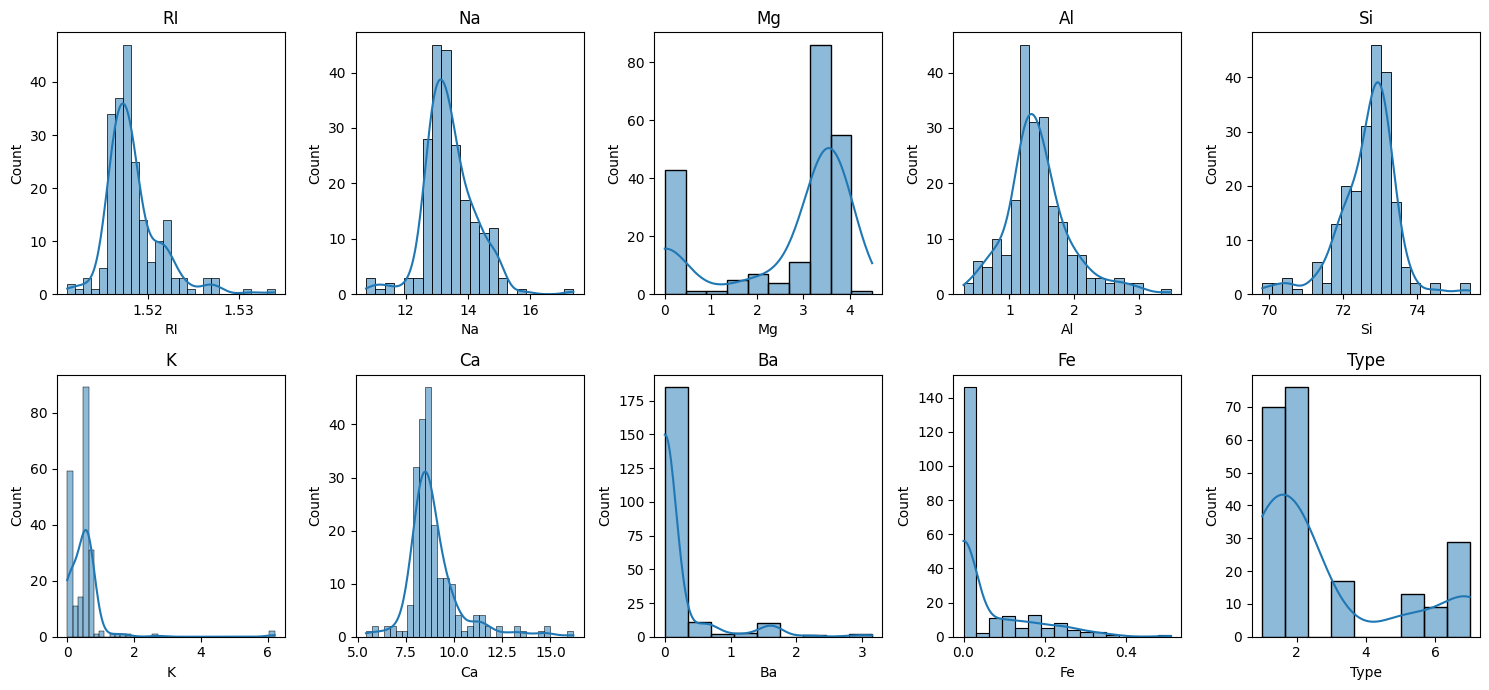

In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 7))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through numerical columns and plot
for i, col in enumerate(df):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

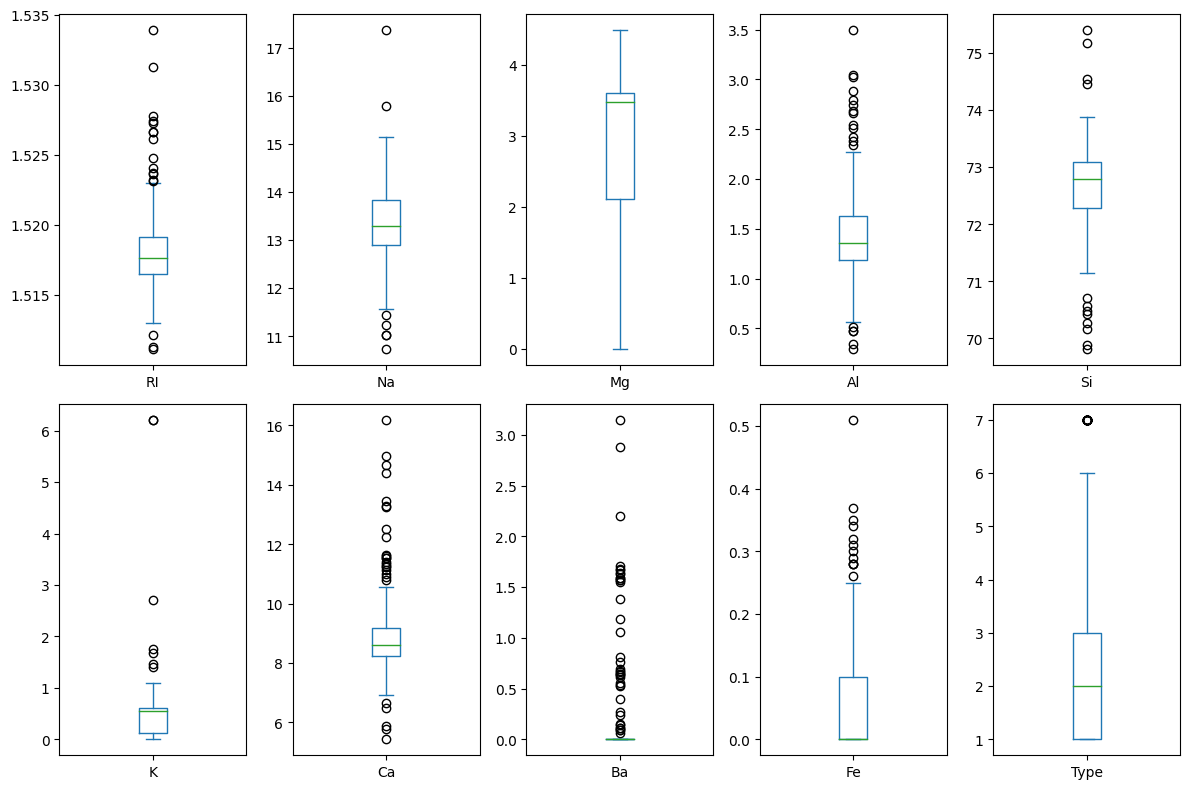

In [ ]:
# Box plots
df.plot(kind='box', subplots=True, layout=(2, 5), figsize=(12, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

Except Type and MG all other columns have outliers and removing them can lead to data lose. Hence we transformations for better results.

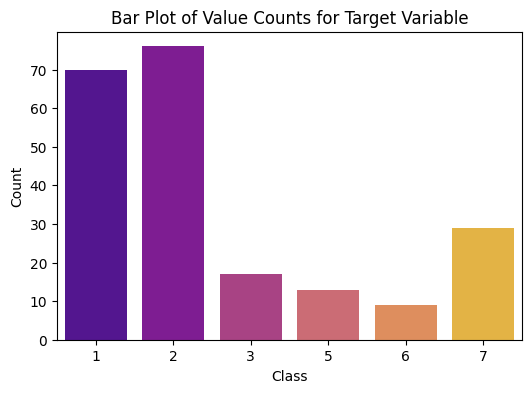

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df['Type'].value_counts().index, y=df['Type'].value_counts().values, palette='plasma')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts for Target Variable')
plt.show()

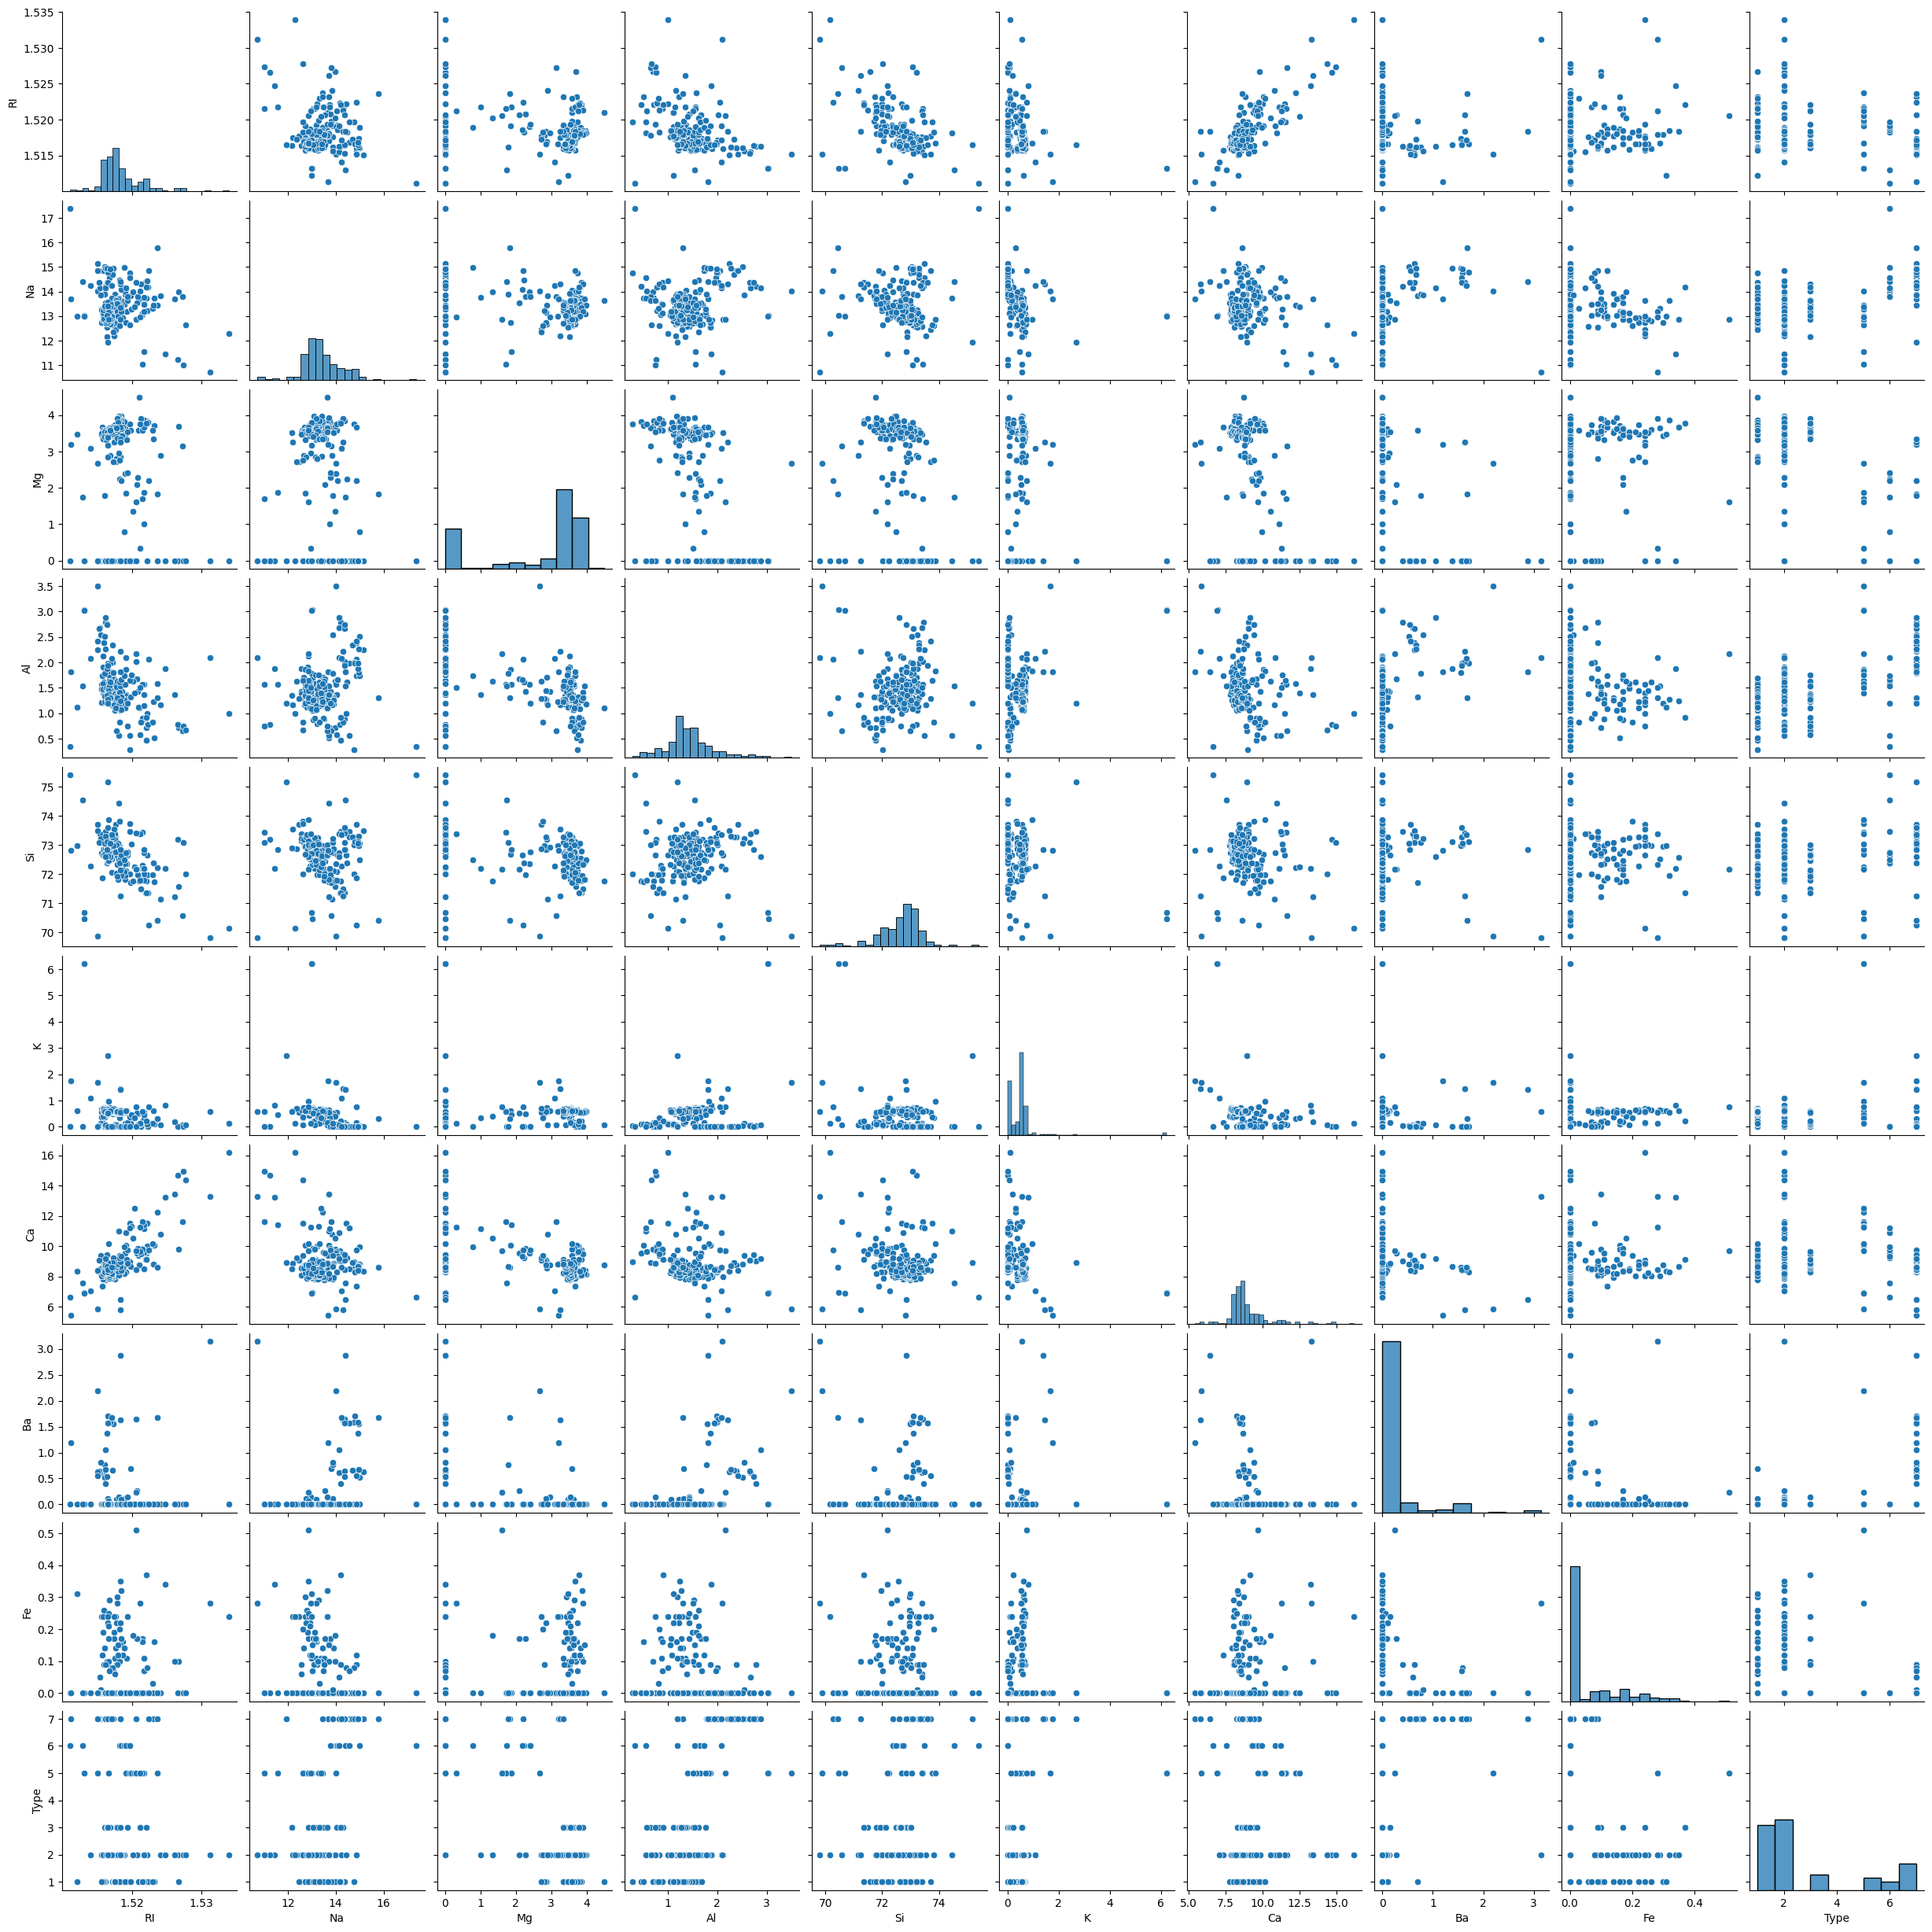

In [ ]:
# Pair plots
sns.pairplot(df)
plt.show()

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


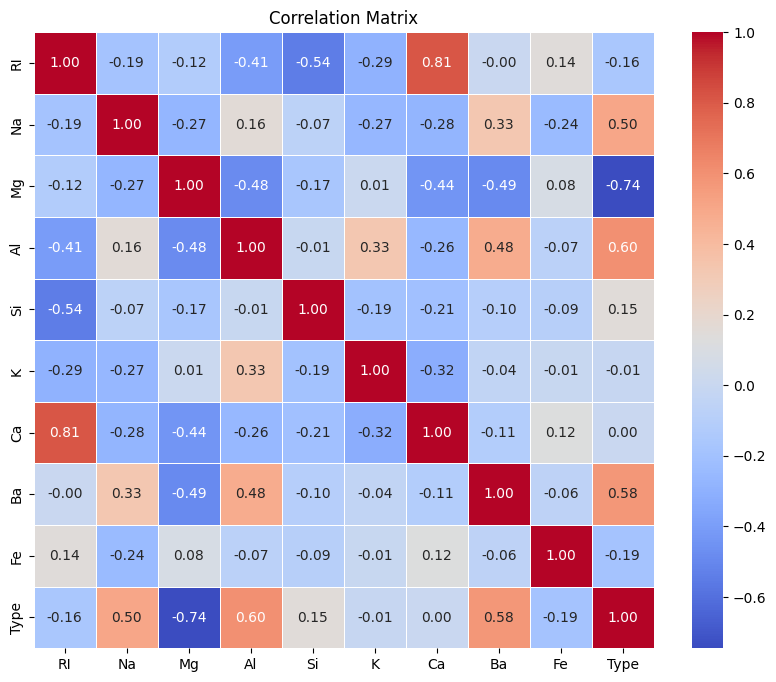

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We can see that Mg has -0.74 correlation with Type.

### 3. Feature Engineering

The Glass dataset is numerical, so encoding is not necessary unless there's a categorical variable.

**Feature Scaling:**

In [ ]:
#Standardizing the features to ensure they are on a similar scale.

# Separate features and target
X = df.drop('Type', axis=1)
y = df['Type']

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

### 4. Random Forest Model Implementation

**Train-Test Split:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Random Forest Classifier:**

In [ ]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

In [ ]:
#Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8372093023255814
Precision: 0.866828165374677
Recall: 0.8372093023255814
F1-Score: 0.8330452594474481
              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



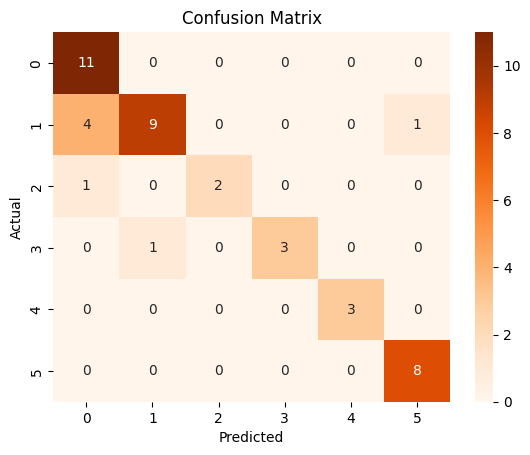

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap='Oranges', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 5. Bagging and Boosting Methods

**Bagging**

In [ ]:
# Initialize the Bagging Classifier
bagging = BaggingClassifier(base_estimator=rf, n_estimators=100, random_state=42)

# Train the model
bagging.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging.predict(X_test)

In [ ]:
# Evaluate the performance
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print(f'Bagging Accuracy: {accuracy_bagging}')
print(f'Bagging Precision: {precision_bagging}')
print(f'Bagging Recall: {recall_bagging}')
print(f'Bagging F1-Score: {f1_bagging}')
print(classification_report(y_test, y_pred_bagging))

Bagging Accuracy: 0.8372093023255814
Bagging Precision: 0.8568475452196384
Bagging Recall: 0.8372093023255814
Bagging F1-Score: 0.8296046862394331
              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.83      0.71      0.77        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.81      0.84        43
weighted avg       0.86      0.84      0.83        43



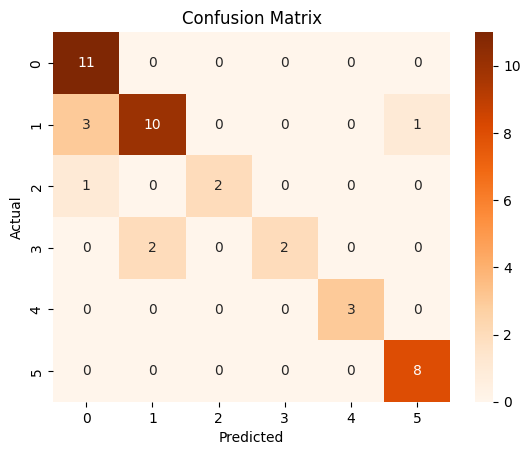

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_bagging),annot=True, cmap='Oranges', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Boosting**

In [ ]:
# Initialize the AdaBoost Classifier
boosting = AdaBoostClassifier(base_estimator=rf, n_estimators=100, random_state=42)

# Train the model
boosting.fit(X_train, y_train)

# Predict on the test set
y_pred_boosting = boosting.predict(X_test)

In [ ]:
# Evaluate the performance
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')

print(f'Boosting Accuracy: {accuracy_boosting}')
print(f'Boosting Precision: {precision_boosting}')
print(f'Boosting Recall: {recall_boosting}')
print(f'Boosting F1-Score: {f1_boosting}')
print(classification_report(y_test, y_pred_boosting))

Boosting Accuracy: 0.8372093023255814
Boosting Precision: 0.8469915097822075
Boosting Recall: 0.8372093023255814
Boosting F1-Score: 0.828960679083798
              precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.83      0.71      0.77        14
           3       0.67      0.67      0.67         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.86      0.81      0.82        43
weighted avg       0.85      0.84      0.83        43



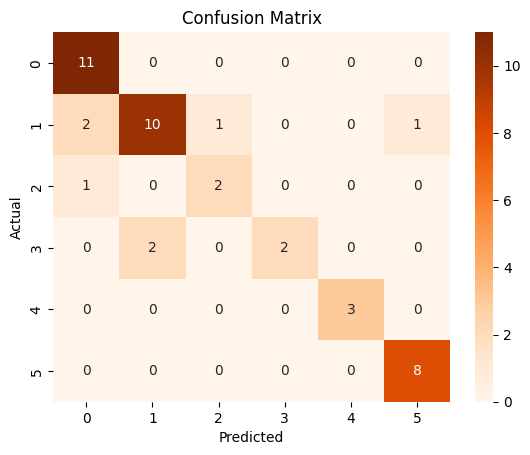

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_boosting),annot=True, cmap='Oranges', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Hyperparameter Tuning for Random Forest

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest classifier
rf_1 = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_1, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.7430252100840337


In [ ]:
# Evaluate on test set using best estimator
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

# Evaluate performance
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print(f'Tuned Accuracy: {accuracy_tuned}')
print(f'Tuned Precision: {precision_tuned}')
print(f'Tuned Recall: {recall_tuned}')
print(f'Tuned F1-Score: {f1_tuned}')
print(classification_report(y_test, y_pred_tuned))

Tuned Accuracy: 0.8372093023255814
Tuned Precision: 0.8568475452196384
Tuned Recall: 0.8372093023255814
Tuned F1-Score: 0.8296046862394331
              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.83      0.71      0.77        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.81      0.84        43
weighted avg       0.86      0.84      0.83        43



## Conclusion on Model Results

### Random Forest Classifier:
- **Accuracy:** 83.72%
- **Precision:** 86.68%
- **Recall:** 83.72%
- **F1-Score:** 83.30%

### Bagging Method:
- **Accuracy:** 83.72%
- **Precision:** 85.68%
- **Recall:** 83.72%
- **F1-Score:** 82.96%

### Boosting Method:
- **Accuracy:** 83.72%
- **Precision:** 84.70%
- **Recall:** 83.72%
- **F1-Score:** 82.90%

### Hyperparameter Tuning for Random Forest:
- **Best Parameters:** `{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}`
- **Best Cross-validation Accuracy:** 74.30%
- **Tuned Model Accuracy:** 83.72%
- **Tuned Model Precision:** 85.68%
- **Tuned Model Recall:** 83.72%
- **Tuned Model F1-Score:** 82.96%

### Summary:
All three methods—Random Forest, Bagging, and Boosting—achieved similar performance metrics, with an accuracy of approximately 83.72%. The precision and F1-scores were slightly higher for the Random Forest model before hyperparameter tuning. After tuning, the Random Forest model achieved comparable results to the Bagging method.

In conclusion, while all models performed similarly in terms of accuracy and recall, the original Random Forest classifier and the Bagging method slightly outperformed Boosting in terms of precision and F1-score. Hyperparameter tuning did not significantly alter the performance but aligned the Random Forest model's metrics closely with the Bagging method.


## Additional Notes

### 1. Explain Bagging and Boosting Methods. How Are They Different from Each Other?

**Bagging (Bootstrap Aggregating):**
- **Concept:** Bagging involves training multiple models on different subsets of the training data (created by random sampling with replacement). Each model is trained independently, and the final prediction is made by averaging the predictions (for regression) or majority voting (for classification) of all the models.
- **Objective:** Reduce variance and prevent overfitting.
- **Advantages:** Improves the stability and accuracy of machine learning algorithms. It works well with high variance algorithms like decision trees.
- **Example:** Random Forest is a popular bagging algorithm that builds multiple decision trees and merges their results.

**Boosting:**
- **Concept:** Boosting trains multiple models sequentially. Each model attempts to correct the errors made by the previous models. The models are not trained independently; instead, each new model is influenced by the performance of the previous ones.
- **Objective:** Reduce both bias and variance, and improve the overall prediction power of the model.
- **Advantages:** Often achieves higher accuracy than bagging by focusing on hard-to-predict cases.
- **Example:** AdaBoost, Gradient Boosting, and XGBoost are popular boosting algorithms.

**Differences Between Bagging and Boosting:**
- **Training Approach:**
  - Bagging trains models independently and combines their results.
  - Boosting trains models sequentially, with each model focusing on the errors of the previous one.
- **Error Reduction:**
  - Bagging primarily reduces variance.
  - Boosting reduces both bias and variance.
- **Model Influence:**
  - In bagging, all models contribute equally to the final prediction.
  - In boosting, models are weighted based on their accuracy, with more accurate models having a greater influence.

### 2. Explain How to Handle Imbalance in the Data

Handling imbalanced data is crucial to ensuring that machine learning models perform well across all classes, especially the minority class. Here are several strategies to handle imbalanced data:

**Data-Level Methods:**
1. **Resampling Techniques:**
   - **Oversampling:** Increase the number of minority class samples by duplicating them or generating new samples (e.g., using SMOTE - Synthetic Minority Over-sampling Technique).
   - **Undersampling:** Reduce the number of majority class samples to balance the dataset.
   - **Combination:** Use both oversampling and undersampling together to achieve a balanced dataset.

2. **Generating Synthetic Samples:**
   - Use techniques like SMOTE or ADASYN to create synthetic samples for the minority class.

**Algorithm-Level Methods:**
1. **Adjusting Class Weights:**
   - Modify the algorithm to give more importance (weight) to the minority class. This can be done in algorithms like SVM, Logistic Regression, and decision trees by setting class weights inversely proportional to class frequencies.

2. **Using Specialized Algorithms:**
   - Use algorithms designed to handle imbalanced data, such as Balanced Random Forest or Adaptive Boosting.

**Evaluation Metrics:**
- Instead of relying solely on accuracy, use metrics that provide better insights into model performance on imbalanced data:
  - **Precision:** Measures the accuracy of positive predictions.
  - **Recall (Sensitivity):** Measures the ability to find all relevant positive cases.
  - **F1-Score:** Harmonic mean of precision and recall.
  - **ROC-AUC Score:** Measures the ability to distinguish between classes.

**Ensemble Methods:**
- Combining multiple models can improve performance on imbalanced data. Techniques like Bagging and Boosting can be adapted to focus on minority class performance.

By implementing these strategies, you can ensure that your machine learning models handle imbalanced data effectively and make accurate predictions across all classes.
